<a href="https://colab.research.google.com/github/jibinjamesjj/Fake-News-Detection/blob/main/Fake_News_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
#importing fake news dataset
df_fake = pd.read_csv(r"Fakenews.csv")

<ipython-input-4-a2603bf22bfd>:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fake = pd.read_csv(r"Fakenews.csv")


In [5]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0  December 31, 2017        NaN        NaN        NaN        NaN        NaN   
1  December 31, 2017        NaN        NaN        NaN        NaN        NaN   
2  December 30, 2017        NaN        NaN        NaN        NaN        NaN   
3  December 29, 2017        NaN        NaN        NaN        NaN        NaN   
4  December 25, 2017        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 162 Unnamed: 163 Unnamed: 164 Unnamed: 165  \
0        NaN  ...          NaN          NaN          NaN          NaN   
1        NaN  ...          NaN          NaN          NaN          NaN   
2        NaN  ...          NaN          NaN          NaN          NaN   
3        NaN  ...          NaN          NaN          NaN          NaN   
4        NaN  ...          NaN          NaN          NaN          NaN   

  Unnamed: 166 Unnamed: 167 Unnamed: 168 Unnamed: 169 Unnamed: 170  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 171  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 172 columns]

In [6]:
#Selecting the required columns
fake_selected_columns = df_fake.iloc[:,:4]
fake_selected_columns.head()

title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
#Added and then deleted the new column to add it again using loc
#fake_selected_columns['new'] = 0
#fake_selected_columns = fake_selected_columns.drop('new', axis=1)
#fake_selected_columns.head()

In [7]:
#Added new column using loc
fake_selected_columns.loc[:, "new"] = 0
fake_selected_columns.head()

<ipython-input-7-3ceea30eee6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_selected_columns.loc[:, "new"] = 0


title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâ€™s Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  new  
0  December 31, 2017    0  
1  December 31, 2017    0  
2  December 30, 2017    0  
3  December 29, 2017    0  
4  December 25, 2017    0

In [8]:
#importing true news dataset
df_true = pd.read_csv(r"Truenews.csv")
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [9]:
#Adding new column using loc
df_true.loc[:, "new"] = 1
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  new  
0  December 31, 2017     1  
1  December 29, 2017     1  
2  December 31, 2017     1  
3  December 30, 2017     1  
4  December 29, 2017     1

In [10]:
len(fake_selected_columns.index)

23502

In [11]:
len(df_true.index)

21417

In [12]:
len(fake_selected_columns.index) + len(df_true.index)

44919

In [13]:
merged_df = pd.merge(fake_selected_columns, df_true, how='outer', on=['title', 'text', 'subject', 'date', 'new'])
len(merged_df.index)

44919

In [ ]:
#count = 0
#for row_index, row in merged_df.iterrows():
#    if re.search(r"\r\r\r\r\r\r\r\n", str(row)):
#        print(type(row))               #Return type is pandas.Series
#        row.replace({r'\r\r\r\r\r\r\r\n': ''} , regex=True)
#        print(row)
#        count += 1

In [ ]:
#merged_df['title'] = merged_df.title.str.replace(r'\r\n', '')

In [14]:
#Shuffle the rows in the dataframe
merged_df = merged_df.sample(frac = 1)

In [15]:
merged_df = merged_df.iloc[:500]

In [16]:
merged_df.head(10)

title  \
14393  Canadian Woman DESTROYS Liberal Prime Minister...   
42060  WATCH PRICELESS EXCHANGE Between Neil Gorsuch ...   
23543  Japan PM says U.N. sanctions on North Korea mu...   
17      #TrumpChicken Is Now Trending And These Tweet...   
4621    Racists Explode As Death Of Bundy Militant Bl...   
41136  UN OFFICIAL TIED TO CLINTONS Set To Face Trial...   
10454  AmCham in China says new U.S. administration n...   
27993  OBAMA HAS BLOOD ON HIS HANDS: Otto Warmbier Ha...   
18011  FBI head confirms Russia election probe, says ...   
4403    President Obama Just Did Something Amazing To...   

                                                    text       subject  \
14393   I m making almost $50,000 per year and I m li...      politics   
42060  Ben Sasse asked Supreme Court nominee Neil Gor...      politics   
23543  TOKYO (Reuters) - Japanese Prime Minister Shin...     worldnews   
17     Earlier today, CBS News and other outlets noti...          News   
4621   On Tuesday night, the FBI finally stopped trea...          News   
41136  Vince Foster Part II?The death by barbell of d...      politics   
10454  BEIJING (Reuters) - (This December 2 has been ...  politicsNews   
27993  We are so sad to report that Otto Warmbier has...     left-news   
18011  WASHINGTON (Reuters) - FBI Director James Come...  politicsNews   
4403   If you ve ever raised a child while living in ...          News   

                      date  new  
14393         Jan 15, 2017    0  
42060         Mar 22, 2017    0  
23543  September 15, 2017     1  
17          August 9, 2017    0  
4621      January 27, 2016    0  
41136         Jun 26, 2016    0  
10454    December 3, 2016     1  
27993         Jun 19, 2017    0  
18011      March 20, 2017     1  
4403        March 11, 2016    0

In [17]:
merged_df.rename(columns={'new': 'label'}, inplace=True)

In [18]:
merged_df.head()

title  \
14393  Canadian Woman DESTROYS Liberal Prime Minister...   
42060  WATCH PRICELESS EXCHANGE Between Neil Gorsuch ...   
23543  Japan PM says U.N. sanctions on North Korea mu...   
17      #TrumpChicken Is Now Trending And These Tweet...   
4621    Racists Explode As Death Of Bundy Militant Bl...   

                                                    text    subject  \
14393   I m making almost $50,000 per year and I m li...   politics   
42060  Ben Sasse asked Supreme Court nominee Neil Gor...   politics   
23543  TOKYO (Reuters) - Japanese Prime Minister Shin...  worldnews   
17     Earlier today, CBS News and other outlets noti...       News   
4621   On Tuesday night, the FBI finally stopped trea...       News   

                      date  label  
14393         Jan 15, 2017      0  
42060         Mar 22, 2017      0  
23543  September 15, 2017       1  
17          August 9, 2017      0  
4621      January 27, 2016      0

In [19]:
#Text Word startistics: min.mean, max and interquartile range

txt_length = merged_df.text.str.split().str.len()
txt_length.describe()

count     500.00000
mean      394.39000
std       322.99011
min         0.00000
25%       189.75000
50%       340.00000
75%       498.50000
max      2814.00000
Name: text, dtype: float64

In [20]:
#Title statistics

title_length = merged_df.title.str.split().str.len()
title_length.describe()

count    500.00000
mean      12.47200
std        4.16075
min        5.00000
25%       10.00000
50%       11.00000
75%       14.00000
max       42.00000
Name: title, dtype: float64

In [ ]:
#The text attribute has a higher word count with an average of 404 words and 75% having more than 512 words.
#The title attribute is a short statement with an average of 12 words, and 75% of them are around 14 words.

1: Reliable
0: Unreliable
Distribution of labels:
label
0    258
1    242
Name: count, dtype: int64


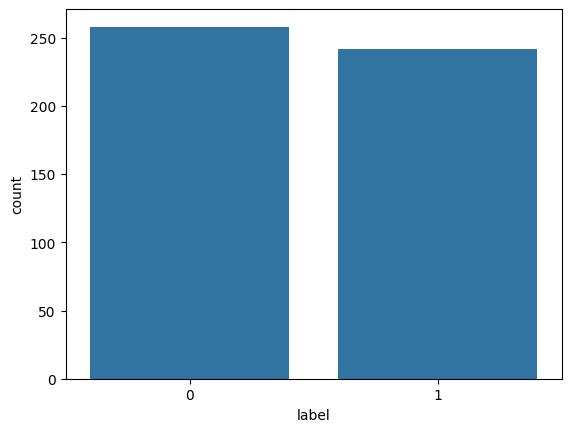

In [21]:
#Distribution of Classes
#Counting plots for both labels:

sns.countplot(x="label", data=merged_df);
print("1: Reliable")
print("0: Unreliable")
print("Distribution of labels:")
print(merged_df.label.value_counts());

In [22]:
print(round(merged_df.label.value_counts(normalize=True),2)*100);

label
0    52.0
1    48.0
Name: proportion, dtype: float64


In [ ]:
#The number of untrustworthy articles (fake or 0) is 23502, while the number of trustworthy articles (reliable or 1) is 21417.
#Almost 52% of the articles are fake.
#Therefore, the accuracy metric will measure how well our model is doing when building a classifier.

In [ ]:
#Data Cleaning for Analysis

#Drop unused rows and columns.
#Perform null value imputation.
#Remove special characters.
#Remove stop words.

In [23]:
# Constants that are used to sanitize the datasets

column_n = ['title', 'text', 'subject', 'date', 'label']
remove_c = ['subject','date']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [24]:
# Clean Datasets
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# Removed unused clumns
def remove_unused_c(df,column_n=remove_c):
    df = df.drop(column_n,axis=1)
    return df

# Impute null values with None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)
    #impute null values
    df = null_process(df)
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [ ]:
#In the code block above:

#We have imported NLTK, which is a famous platform for developing Python applications that interact with human language. Next, we import re for regex.
#We import stopwords from nltk.corpus. When working with words, particularly when considering semantics, we sometimes need to eliminate common words that do not add any significant meaning to a statement, such as "but", "can", "we", etc.
#PorterStemmer is used to perform stemming words with NLTK. Stemmers strip words of their morphological affixes, leaving the word stem solely.
#We import WordNetLemmatizer() from NLTK library for lemmatization. Lemmatization is much more effective than stemming. It goes beyond word reduction and evaluates a language's whole lexicon to apply morphological analysis to words, with the goal of just removing inflectional ends and returning the base or dictionary form of a word, known as the lemma.
#stopwords.words('english') allow us to look at the list of all the English stop words supported by NLTK.
#remove_unused_c() function is used to remove the unused columns.
#We impute null values with None using the null_process() function.
#Inside the function clean_dataset(), we call remove_unused_c() and null_process() functions. This function is responsible for data cleaning.
#To clean text from unused characters, we have created the clean_text() function.
#For preprocessing, we will use only stop word removal. We created the nltk_preprocess() function for that purpose.

In [25]:
#Preprocessing the text and title:

# Perform data cleaning on train and test dataset by calling clean_dataset function
df = clean_dataset(merged_df)
# apply preprocessing on text through apply method by calling the function nltk_preprocess
df["text"] = df.text.apply(nltk_preprocess)
# apply preprocessing on title through apply method by calling the function nltk_preprocess
df["title"] = df.title.apply(nltk_preprocess)

In [26]:
# Dataset after cleaning and preprocessing step
df.head()

title  \
14393  canadian woman destroys liberal prime minister...   
42060  watch priceless exchange neil gorsuch ben sass...   
23543  japan pm say un sanction north korea must firm...   
17           trumpchicken trending tweet hilarious image   
4621   racist explode death bundy militant blamed jew...   

                                                    text  label  
14393  making almost 50000 per year living energy pov...      0  
42060  ben sasse asked supreme court nominee neil gor...      0  
23543  tokyo reuters japanese prime minister shinzo a...      1  
17     earlier today cbs news outlet noticed somethin...      0  
4621   tuesday night fbi finally stopped treating ore...      0

In [ ]:
#Explorative Data Analysis
#Univariate Analysis
#Bivariate Analysis

In [ ]:
#import sys
#print(sys.executable)

In [ ]:
#pip install wordcloud

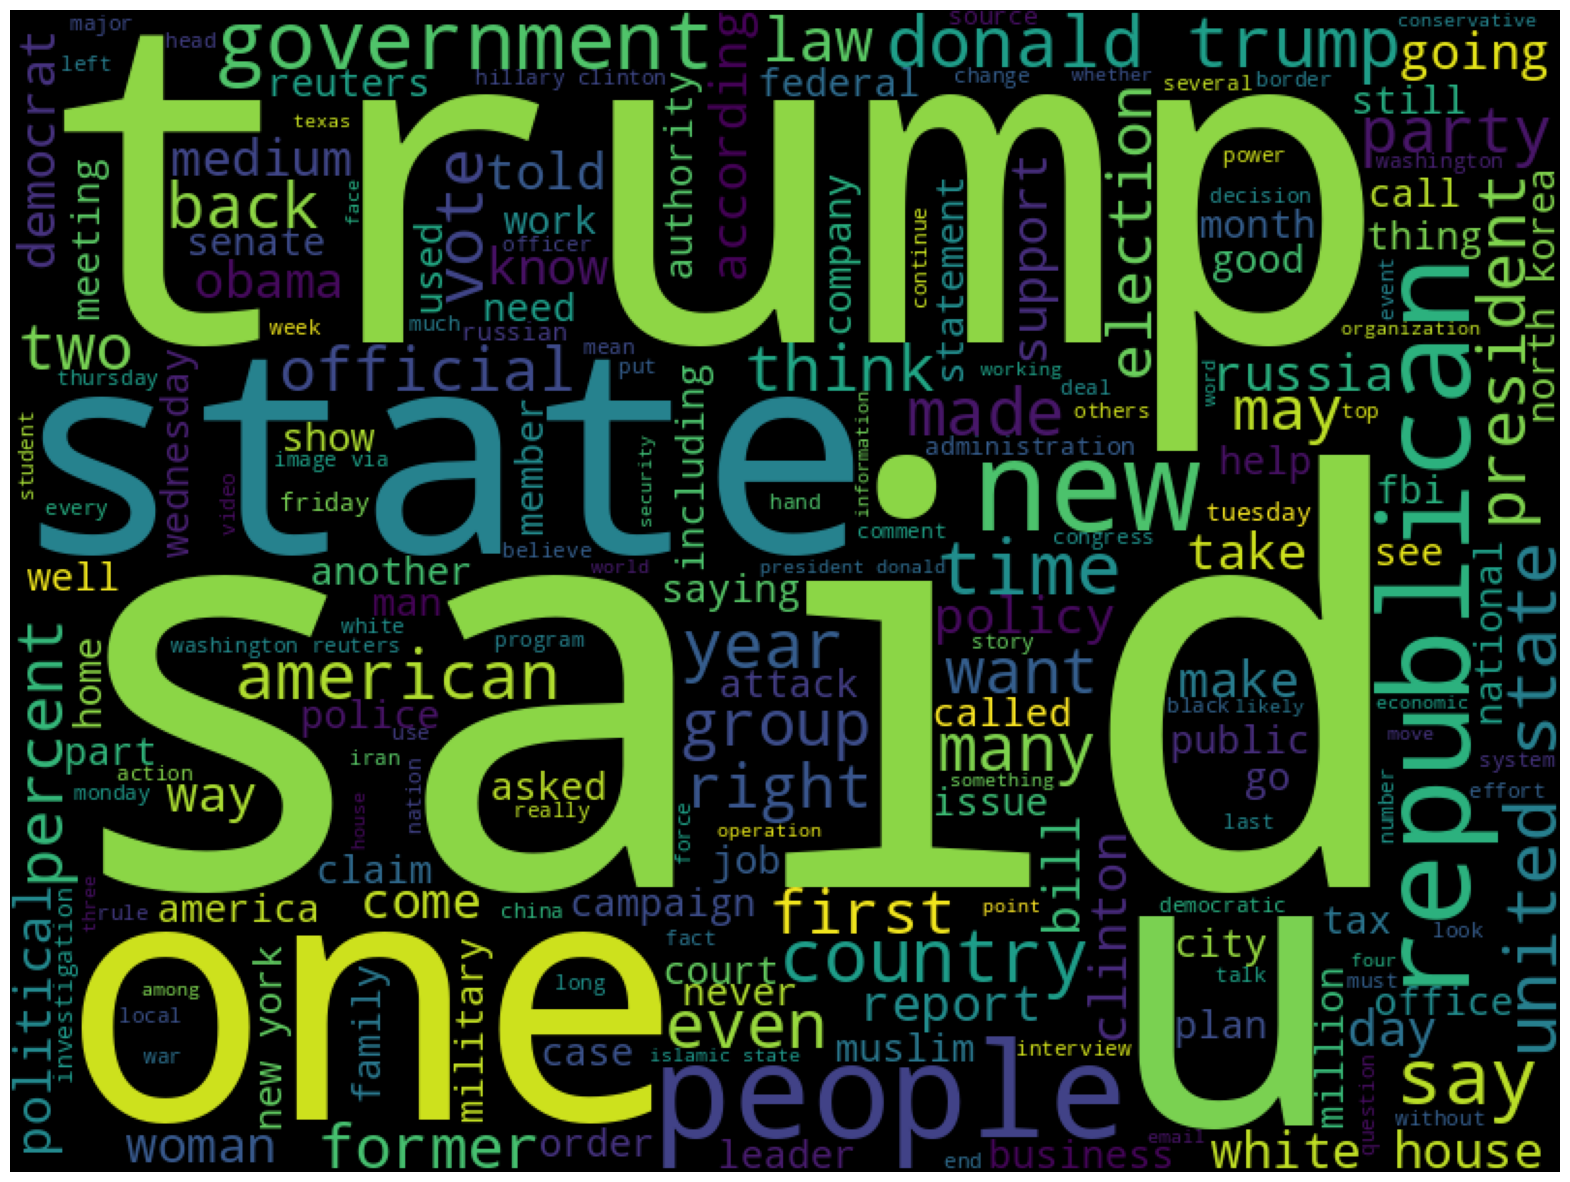

In [27]:
#Creating a Word Cloud

from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

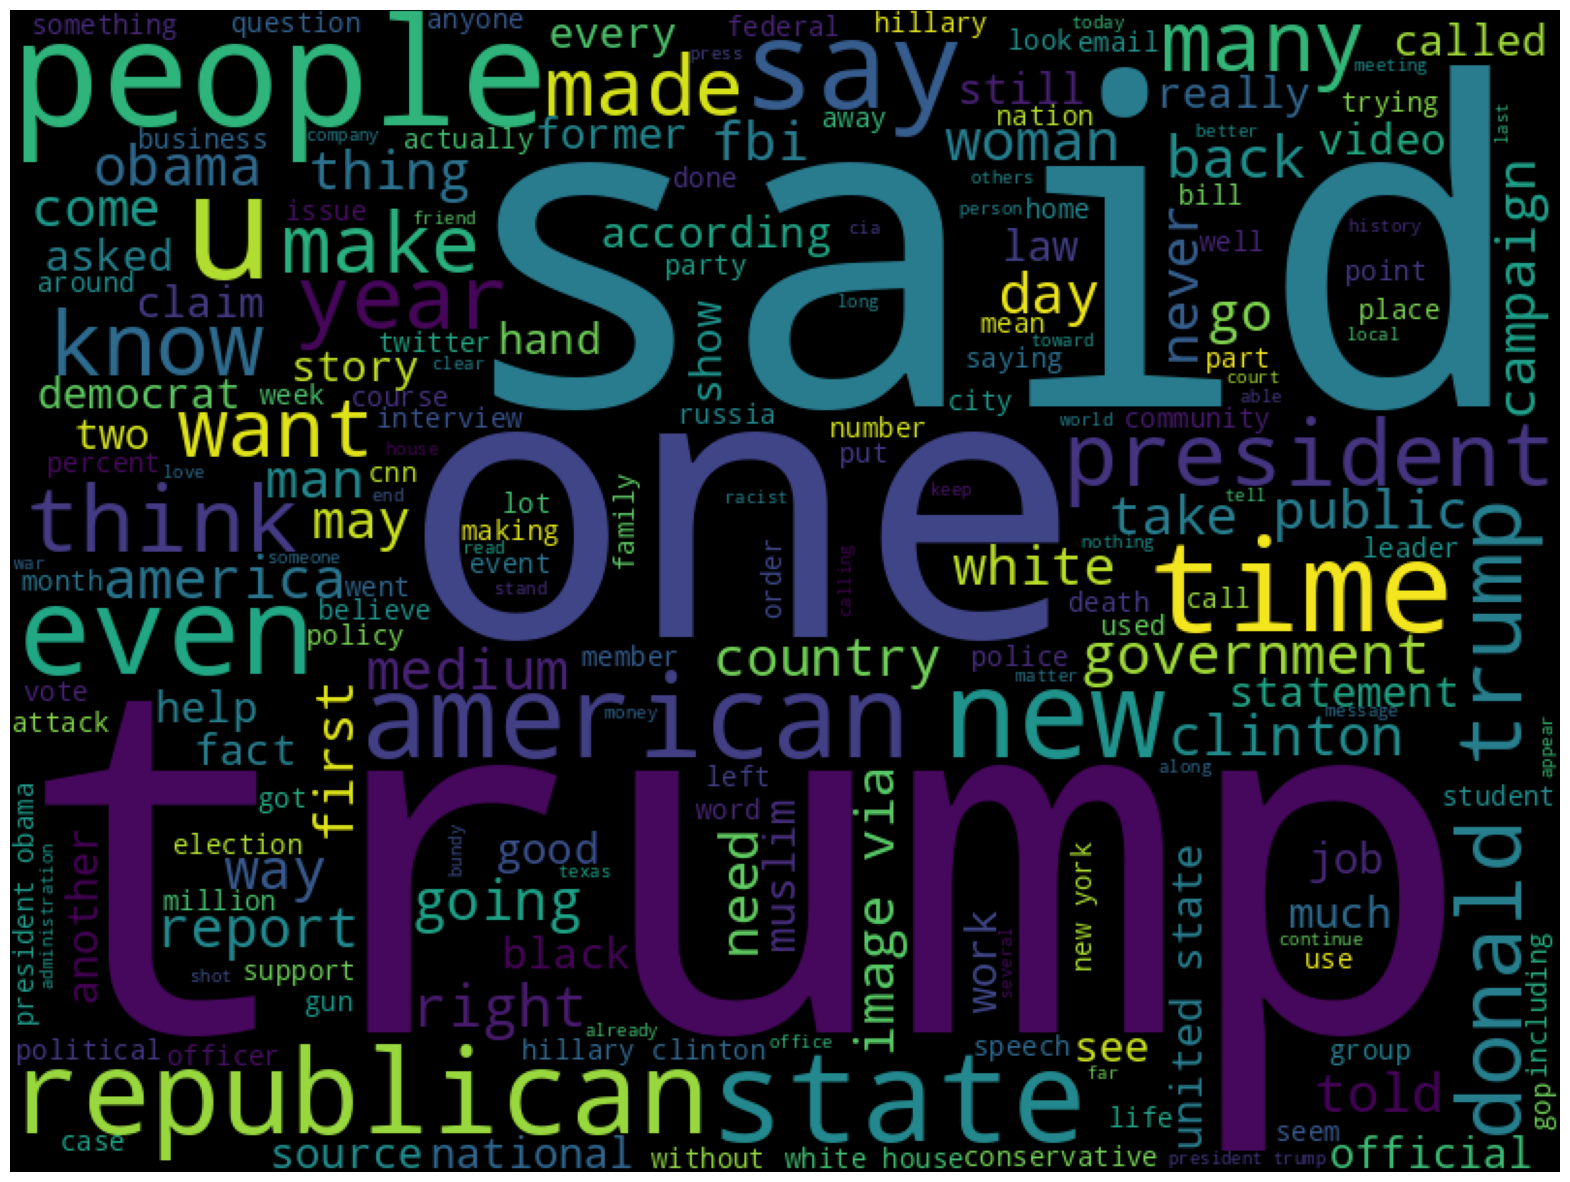

In [28]:
#word cloud for fake news only

fake_n = ' '.join(df[df['label']==0]['text'])
wc = wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

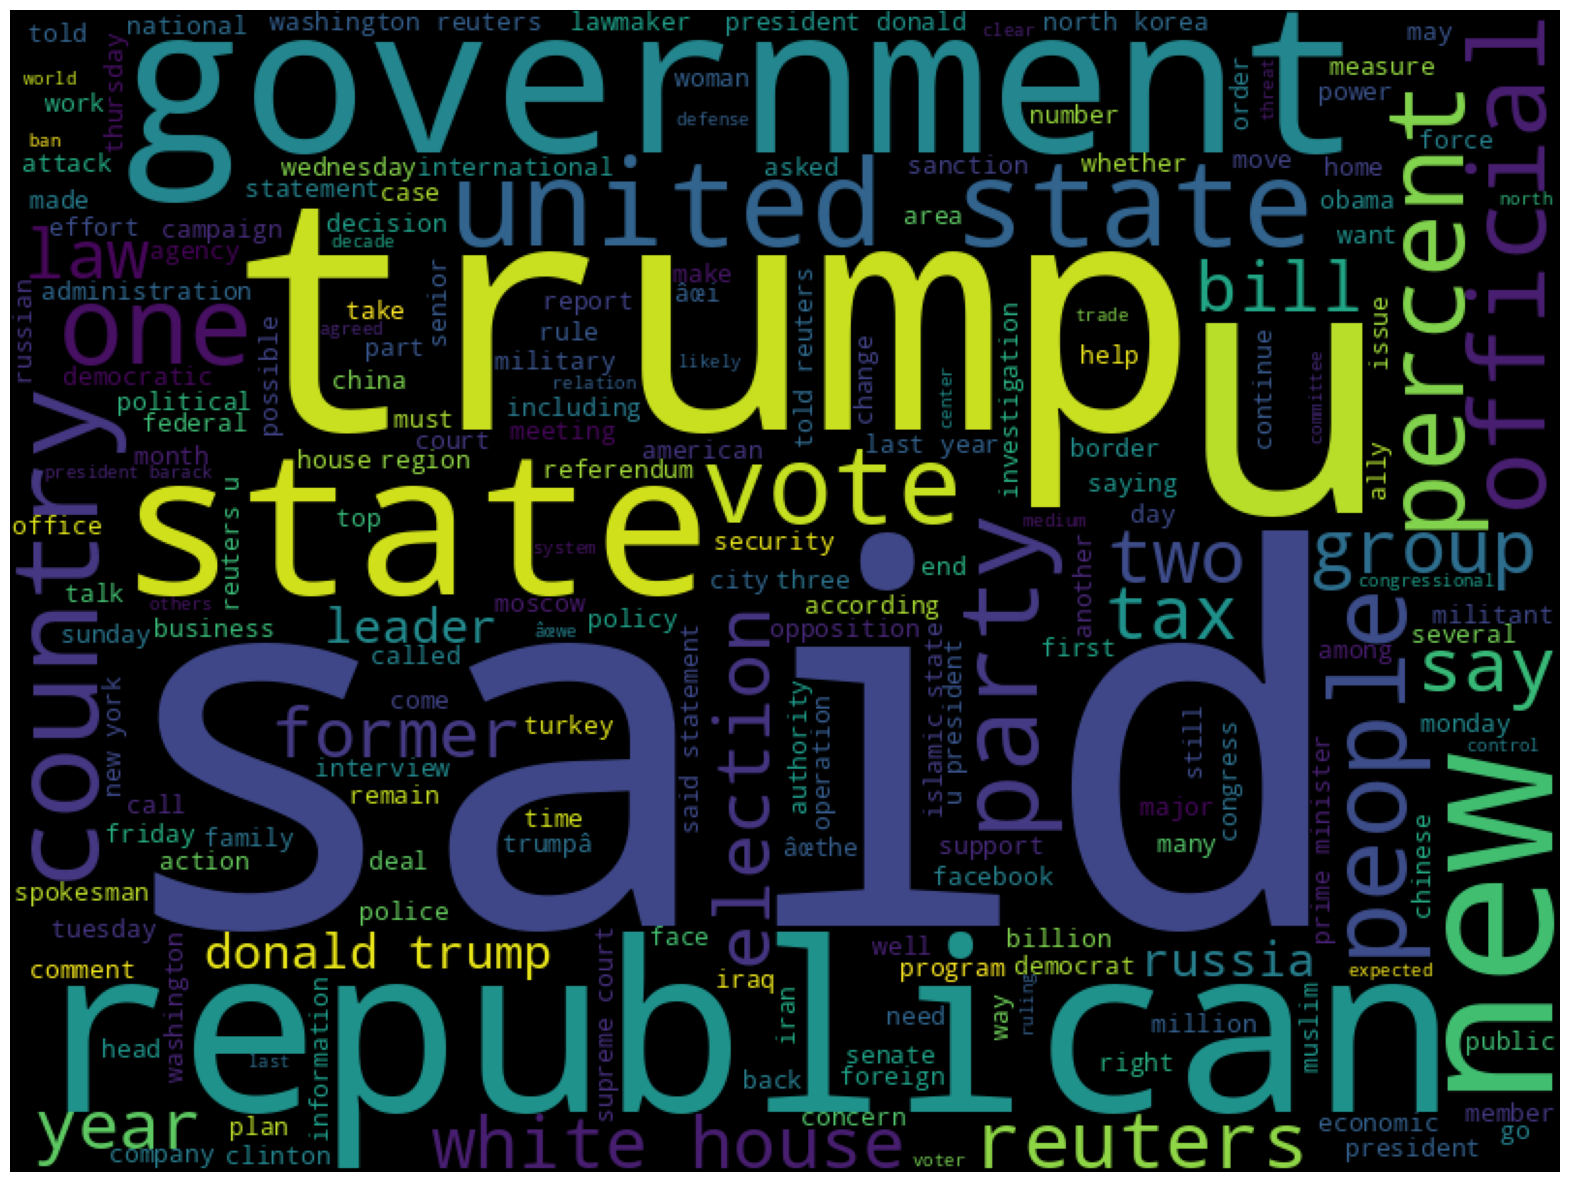

In [29]:
#word cloud for reliable news only

true_n = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [30]:
#Most Frequent Bigram (Two-word Combination)

#most common bigram on the fake news:

def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  fake_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  fake_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

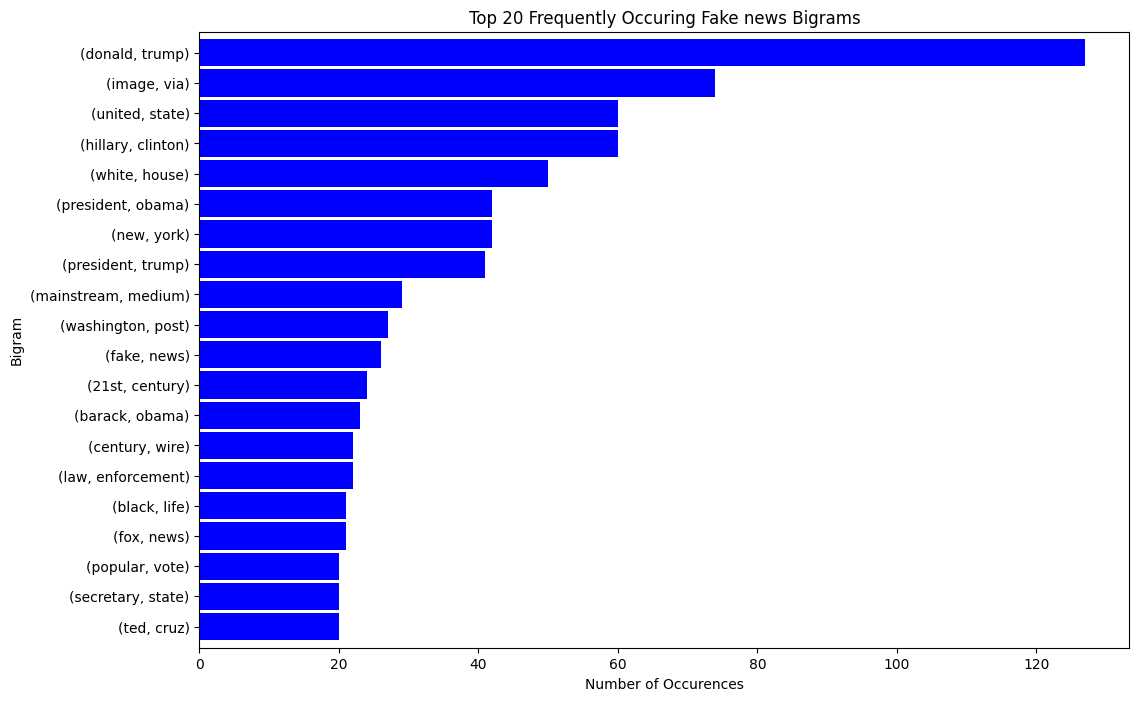

In [31]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

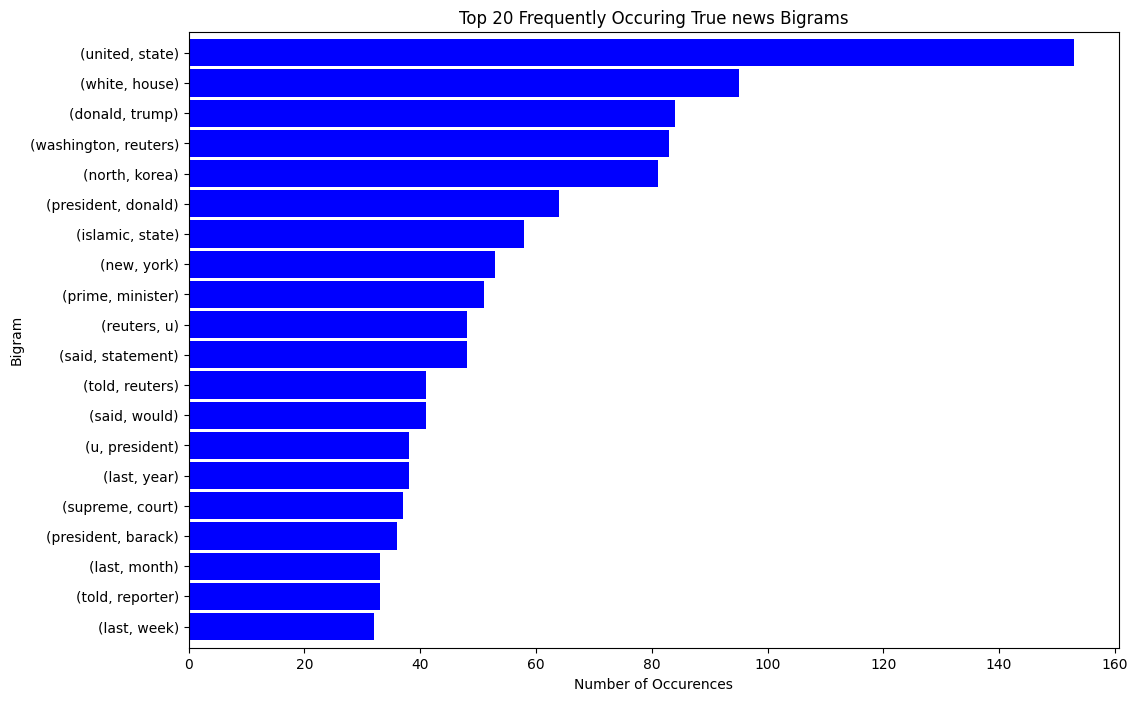

In [32]:
#The most common bigram on the reliable news:

plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

In [33]:
#Most Frequent Trigram (Three-word combination)

#The most common trigram on fake news:

plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

In [34]:
#The most common trigram on reliable news:

plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

In [ ]:
#Building a Classifier by Fine-tuning BERT

In [ ]:
#pip install transformers
#pip install transformers==2.11.0,tokenizers==0.7.0
#pip install --force-reinstall -v transformers==2.11.0,tokenizers==0.7.0
#pip install -Iv transformers==2.11.0

In [35]:
#importing the necessary libraries

import torch
from transformers.file_utils import is_tf_available, is_torch_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

import random

In [36]:
#We want to make our results reproducible even if we restart our environment:

def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

In [37]:
#The model we're going to use is the bert-base-uncased:

# the model we gonna train, base uncased BERT
# check text classification models here: https://huggingface.co/models?filter=text-classification
model_name = "bert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 512

In [38]:
# loading the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [39]:
#Data Preparation

#Let's now clean NaN values from text, author, and title columns:

news_df = merged_df[merged_df['text'].notna()]
news_df = news_df[news_df["subject"].notna()]
news_df = news_df[news_df["title"].notna()]

In [40]:
#Next, making a function that takes the dataset as a Pandas dataframe and returns the train/validation splits of texts and labels as lists:

def prepare_data(df, test_size=0.2, include_title=True, include_subject=True):
  texts = []
  labels = []
  for i in range(len(df)):
    text = df["text"].iloc[i]
    label = df["label"].iloc[i]
    if include_title:
      text = df["title"].iloc[i] + " - " + text
    if include_subject:
      text = df["subject"].iloc[i] + " : " + text
    if text and label in [0, 1]:
      texts.append(text)
      labels.append(label)
  return train_test_split(texts, labels, test_size=test_size)

train_texts, valid_texts, train_labels, valid_labels = prepare_data(news_df)

In [41]:
#making sure the labels and texts have the same length
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

400 400
100 100


In [42]:
#Tokenizing the Dataset

#Let's use the BERT tokenizer to tokenize our dataset:

# tokenize the dataset, truncate when passed `max_length`,
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [43]:
#Converting the encodings into a PyTorch dataset:

class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [44]:
#Loading and Fine-tuning the Model

#We'll be using BertForSequenceClassification to load our BERT transformer model:

# load the model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
#Below function is a callback to calculate the accuracy on each validation step:

from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [46]:
#Let's initialize the training parameters:

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=5,  # batch size per device during training
    per_device_eval_batch_size=10,   # batch size for evaluation
    warmup_steps=5,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=100,               # log & save weights each logging_steps
    save_steps=100,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [47]:
#Instantiating the trainer

trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [48]:
# train the model
trainer.train()

TrainOutput(global_step=80, training_loss=0.1703195333480835, metrics={'train_runtime': 43.3349, 'train_samples_per_second': 9.23, 'train_steps_per_second': 1.846, 'total_flos': 105244422144000.0, 'train_loss': 0.1703195333480835, 'epoch': 1.0})

In [49]:
# evaluate the current model after training
trainer.evaluate()

{'eval_loss': 0.0026520397514104843,
 'eval_accuracy': 1.0,
 'eval_runtime': 2.6188,
 'eval_samples_per_second': 38.186,
 'eval_steps_per_second': 3.819,
 'epoch': 1.0}

In [50]:
# saving the fine tuned model & tokenizer
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('fake-news-bert-base-uncased/tokenizer_config.json',
 'fake-news-bert-base-uncased/special_tokens_map.json',
 'fake-news-bert-base-uncased/vocab.txt',
 'fake-news-bert-base-uncased/added_tokens.json',
 'fake-news-bert-base-uncased/tokenizer.json')

In [51]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "fake",
        1: "reliable"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [52]:
real_news = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

In [54]:
get_prediction(real_news, convert_to_label=True)

'fake'